In [0]:
import numpy as np
import keras
import librosa
import __future__
import os
!pip install pysoundfile
import tensorflow as tf
import soundfile as sf 
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [0]:
#for file in dev-clean.tar.gz 
!wget http://www.openslr.org/resources/12/dev-clean.tar.gz

--2020-06-14 17:26:44--  http://www.openslr.org/resources/12/dev-clean.tar.gz
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 337926286 (322M) [application/x-gzip]
Saving to: ‘dev-clean.tar.gz’

dev-clean.tar.gz    100%[===================>] 322.27M  9.98MB/s    in 32s     

2020-06-14 17:27:17 (10.1 MB/s) - ‘dev-clean.tar.gz’ saved [337926286/337926286]



In [0]:
os.listdir()
os.mkdir("/tmp/data")
os.listdir()
!tar -xf dev-clean.tar.gz -C /tmp/data

In [0]:
os.listdir('/tmp/data')

['LibriSpeech']

In [0]:
os.listdir('/tmp/data/LibriSpeech')

['LICENSE.TXT',
 'dev-clean',
 'CHAPTERS.TXT',
 'SPEAKERS.TXT',
 'BOOKS.TXT',
 'README.TXT']

In [0]:
os.listdir('/tmp/data/LibriSpeech/dev-clean')

['5536',
 '5895',
 '2078',
 '5338',
 '3752',
 '1993',
 '652',
 '6241',
 '7976',
 '1462',
 '6295',
 '1919',
 '2803',
 '3000',
 '3081',
 '251',
 '2428',
 '6313',
 '84',
 '6319',
 '422',
 '5694',
 '3853',
 '777',
 '1988',
 '2035',
 '3536',
 '6345',
 '2086',
 '3170',
 '1673',
 '174',
 '7850',
 '8842',
 '8297',
 '2277',
 '2412',
 '1272',
 '2902',
 '3576']

In [0]:
os.listdir('/tmp/data/LibriSpeech/dev-clean/5536')

['43358', '43363', '43359']

In [0]:
os.listdir('/tmp/data/LibriSpeech/dev-clean/5536/43358')

['5536-43358-0000.flac',
 '5536-43358-0015.flac',
 '5536-43358-0008.flac',
 '5536-43358-0001.flac',
 '5536-43358.trans.txt',
 '5536-43358-0010.flac',
 '5536-43358-0017.flac',
 '5536-43358-0005.flac',
 '5536-43358-0007.flac',
 '5536-43358-0018.flac',
 '5536-43358-0003.flac',
 '5536-43358-0011.flac',
 '5536-43358-0002.flac',
 '5536-43358-0006.flac',
 '5536-43358-0004.flac',
 '5536-43358-0019.flac',
 '5536-43358-0016.flac',
 '5536-43358-0009.flac',
 '5536-43358-0014.flac',
 '5536-43358-0013.flac',
 '5536-43358-0012.flac']

In [0]:
f = open('/tmp/data/LibriSpeech/dev-clean/5536/43358/5536-43358.trans.txt','r')
print (f.read())
# sample to perceive the transcripts for each file

5536-43358-0000 THE SAVAGE PHILOSOPHER THE DUAL MIND
5536-43358-0001 THE ORIGINAL ATTITUDE OF THE AMERICAN INDIAN TOWARD THE ETERNAL THE GREAT MYSTERY THAT SURROUNDS AND EMBRACES US WAS AS SIMPLE AS IT WAS EXALTED
5536-43358-0002 IT WAS SILENT BECAUSE ALL SPEECH IS OF NECESSITY FEEBLE AND IMPERFECT THEREFORE THE SOULS OF MY ANCESTORS ASCENDED TO GOD IN WORDLESS ADORATION
5536-43358-0003 NONE MIGHT EXHORT OR CONFESS OR IN ANY WAY MEDDLE WITH THE RELIGIOUS EXPERIENCE OF ANOTHER
5536-43358-0004 AMONG US ALL MEN WERE CREATED SONS OF GOD AND STOOD ERECT AS CONSCIOUS OF THEIR DIVINITY
5536-43358-0005 THAT SOLITARY COMMUNION WITH THE UNSEEN WHICH WAS THE HIGHEST EXPRESSION OF OUR RELIGIOUS LIFE IS PARTLY DESCRIBED IN THE WORD BAMBEDAY LITERALLY MYSTERIOUS FEELING WHICH HAS BEEN VARIOUSLY TRANSLATED FASTING AND DREAMING
5536-43358-0006 THE FIRST BAMBEDAY OR RELIGIOUS RETREAT MARKED AN EPOCH IN THE LIFE OF THE YOUTH WHICH MAY BE COMPARED TO THAT OF CONFIRMATION OR CONVERSION IN CHRISTIAN EXPERI

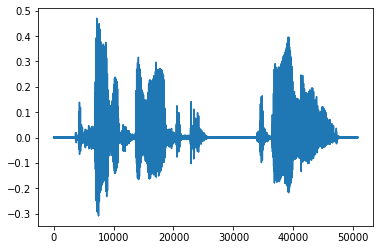

In [0]:
x, sr = librosa.load('/tmp/data/LibriSpeech/dev-clean/5536/43358/5536-43358-0000.flac', sr = 16000)
plt.plot(x)
#plotting the .flac file

In [0]:
"""dev-clean has sub-directories which further have sub-directories 
   within which are stored .flac file and transcripts for the same.

   In the code below we try to access each of the transcripts and their .flac 
   files by running nested loops. We keep appending this data to make
   a list"""
def datadevclean():
  data = []
  for i in os.listdir('/tmp/data/LibriSpeech/dev-clean'):
    for j in os.listdir('/tmp/data/LibriSpeech/dev-clean/'+ i):
      for k in os.listdir('/tmp/data/LibriSpeech/dev-clean/' + i + '/' + j):
        if k.endswith('trans.txt'):
          
          """we open each transcript and store the lines(as trans) and the 
            corresponding .flac file (as audiofile) of that line
            then we append it"""

          transfile = '/tmp/data/LibriSpeech/dev-clean/' + i + '/' + j + '/' + k
          with open(transfile, "r") as file:
            for line in file:
              posofspace = line.find(' ',0,20)
              if (posofspace != -1):
                trans = line[(posofspace+1):]
                audiofile = '/tmp/data/LibriSpeech/dev-clean/' + i + '/' + j + '/' + line[:posofspace] + '.flac'
                sample = (audiofile, trans)  
                data.append (sample)
          file.closed
  # print (data) 
  return data
# print (data)  

In [0]:
token_to_index={'<pad>': 0,
                'a': 1,
                'b': 2,
                'c': 3,
                'd': 4,
                'e': 5,
                'f': 6,
                'g': 7,
                'h': 8,
                'i': 9,
                'j': 10,
                'k': 11,
                'l': 12,
                'm': 13,
                'n': 14,
                'o': 15,
                'p': 16,
                'q': 17,
                'r': 18,
                's': 19,
                't': 20,
                'u': 21,
                'v': 22,
                'w': 23,
                'x': 24,
                'y': 25,
                'z': 26,
                ' ': 27
                }

In [0]:
# """loading the textaudiofeatures.ipynb from drive the same has been uploaded in
#    the git repo also at 
#    https://colab.research.google.com/drive/1RG_kFj1c3-AIiGvHuSVN0k3U2GOuFUGJ#scrollTo=8AoHl2akh7WO
#    this file extracts features from text and audio input
# """
# from google.colab import drive
# drive.mount ('/content/drive')
# """ authenticating google drive access"""
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# fid = drive.ListFile({'q':"title='textaudiofeatures.ipynb'"}).GetList()[0]['id']
# f = drive.CreateFile({'id': fid})
# print(fid)
# f.GetContentFile('textaudiofeatures.ipynb')
# import textaudiofeatures 

'loading the textaudiofeatures.ipynb from drive the same has been uploaded in\n   the git repo also at \n   https://colab.research.google.com/drive/1RG_kFj1c3-AIiGvHuSVN0k3U2GOuFUGJ#scrollTo=8AoHl2akh7WO\n   this file extracts features from text and audio input\n'

In [0]:
""" the following two functions has also been uploaded by me before on a jupyter notebook at
    https://colab.research.google.com/drive/1RG_kFj1c3-AIiGvHuSVN0k3U2GOuFUGJ#scrollTo=8AoHl2akh7WO
"""

def spectrogram_features(samples, samplerate, stridems=10.0,
                                windowms=20.0, freqmax=None, eps=1e-14):
  """Compute the spectrograms for the input samples(waveforms)."""
  
  # samplerate is the number of times a signal is read in a second (eg n, then the signal is sampled every 1/n seconds)
  # windowms is the number of samples(window duration) in ms

  # samplerate/2 is the Nyquist frequency
  if freqmax is None:
    freqmax = samplerate / 2

  # raising exception when maximum freq is above Nyquist frequency  
  if freqmax > samplerate / 2:
    raise ValueError("freqmax must not be greater than half of sample rate.")

  if stridems > windowms:
    raise ValueError("Stride size must not be greater than window size.")

  # stride_size is the frame (window) overlap amplitudes (frequency bins)
  # each window is going to have window_size amplitudes
  stride_size = int(0.001 * samplerate * stridems)
  window_size = int(0.001 * samplerate * windowms)

  # Extract strided windows
  truncate_size = (len(samples) - window_size) % stride_size
  samples = samples[:len(samples) - truncate_size]
  nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
  nstrides = (samples.strides[0], samples.strides[0] * stride_size)
  windows = np.lib.stride_tricks.as_strided(
      samples, shape=nshape, strides=nstrides)
  assert np.all(
      windows[:, 1] == samples[stride_size:(stride_size + window_size)])

  # Window weighting, squared Fast Fourier Transform (fft), scaling
  # Weighting window is used here to handle discontinuity of this small signal
  weighting = np.hanning(window_size)[:, None]
  fft = np.fft.rfft(windows * weighting, axis=0)
  fft = np.absolute(fft)
  fft = fft**2
  scale = np.sum(weighting**2) * samplerate
  fft[1:-1, :] *= (2.0 / scale)
  fft[(0, -1), :] /= scale
  # Prepare fft frequency list
  freqs = float(samplerate) / window_size * np.arange(fft.shape[0])

  # Compute spectrogram feature
  ind = np.where(freqs <= freqmax)[0][-1] + 1
  specgram = np.log(fft[:ind, :] + eps)
  return np.transpose(specgram, (1, 0))

In [0]:
def label_feature(text, token_to_index):
  """Convert string to a list of integers."""

  # removing all the leading and trailing spaces from a string and then converting into lowercase and making a list of it
  tokens = list(text.strip().lower())
  features = [token_to_index[token] for token in tokens]
  return features

In [0]:
data = datadevclean()
# print(data[0])
# print(len(data))
traindata = data[:1500]
# print(traindata[0])
# print(len(traindata))
validdata = data[1500:]
class DataGenerator (keras.utils.Sequence):

  def __init__(self, batch_size = 32, shuffle=True, dim = (1874,161)):
    # Constructor for the class assigning ivalues to object properties
    self.batch_size = batch_size
    # self.data = data
    self.data = datadevclean()
    self.list_IDs = np.arange(len(data))
    self.shuffle = shuffle
    self.on_epoch_end()
    self.dim = dim

  def __len__ (self):  
    # Returns number of batches per epoch
    #print int (np.floor (len (self.list_IDs) / self.batch_size))
    return int (np.floor (len (self.list_IDs) / self.batch_size))
 
  def __getitem__ (self, index):
    # Return 1 batch of data

    # 'Generate indexes of the batch'
    indexes = self.indexes [index*self.batch_size:(index+1)*self.batch_size]
    # print (indexes)

    # 'Find list of IDs'
    list_IDs_temp = [self.list_IDs[k] for k in indexes]
    # print (list_IDs_temp)

    # 'Generate data'
    X, y = self.__data_generation (list_IDs_temp)

    # print (X)
    # print (y)

    return X, y

  def on_epoch_end (self):
    # Updates indexes or shuffle them after each epoch
    self.indexes = np.arange (len (self.list_IDs))
    if self.shuffle == True:
      np.random.shuffle (self.indexes)

  def __data_generation (self, list_IDs_temp):
    # Generates data containing batch_size samples
    X = np.empty((self.batch_size, *self.dim))
    Y = np.empty((self.batch_size), dtype =list)
    for i, ID in enumerate(list_IDs_temp):
      audiofilepath, transcript = data[i]
      audio, samplerate = sf.read(audiofilepath)
      linetoidx = label_feature(transcript, token_to_index)
      # print (samplerate)
      # print (audio)
      # print (len(audio))
      # plt.plot(audio)
      if len(audio)>300000:
            audio = audio[:300000]
      else:
            audio = np.pad(audio, (0, max(0, 300000 - len(audio))), "constant")
      x = spectrogram_features(audio, samplerate, stridems=10.0,
                                windowms=20.0, freqmax=None, eps=1e-14)
      if len(linetoidx) > 500:
        linetoidx = linetoidx[:500]
      else:
        linetoidx = np.pad(linetoidx, (0, max(0, 500 - len(linetoidx))), "constant")
      # print (x)
      # print (type(audio))
      # print(linetoidx)
      # print (type(linetoidx))
      # print (list(linetoidx))
      X[i,]=x
      Y[i]=list(linetoidx)
    return X, Y

84
[-24.17099347 -18.41639434 -18.35941488 -20.94476492 -22.46692846
 -22.26350046 -24.59447268 -23.52515813 -22.76446262 -22.73006398
 -24.41032687 -25.37048961 -24.47260839 -24.27616092 -25.32889376
 -24.50952599 -23.02778138 -23.45133557 -24.63876799 -24.03353309
 -24.65651349 -24.806553   -24.84478573 -24.86604459 -24.08080468
 -23.89975362 -24.23993297 -25.92099287 -24.81219861 -23.38166543
 -23.97692839 -25.06667025 -25.94449588 -26.08434314 -25.16261857
 -24.34384983 -24.42370144 -25.43554792 -25.88698362 -25.07373657
 -25.89507108 -28.06679332 -29.0933442  -26.70799301 -25.89471644
 -24.49300701 -24.94888458 -24.33960743 -24.74225685 -26.02102806
 -24.50515093 -25.97613388 -27.8833619  -28.04694234 -29.93583811
 -28.32015242 -27.51189083 -26.95294278 -25.4062068  -29.34594873
 -25.44598867 -26.24971465 -26.86695145 -26.31716056 -27.48972489
 -25.38862942 -25.63825696 -27.89901826 -26.24357393 -25.13751579
 -25.7661666  -25.67021838 -25.36872984 -25.46682208 -27.14738322
 -27.91

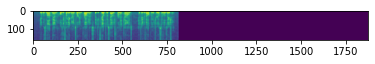

In [47]:
train = DataGenerator()
print(len(train))
x, y =train.__getitem__(10)
print(x[10][1])
print(x[10])
print(len(x[10]))
print(y[10])
print(len(y[10]))
plt.imshow(np.transpose(x[10]))